In [1]:
import pandas as pd

In [2]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 86AA-243D

 Directory of d:\Data Career\mitra_solusi_telematika_assessment

24/02/2023  19:03    <DIR>          .
24/02/2023  18:01    <DIR>          ..
24/02/2023  18:01           134.838 Data Scientist Mid.pdf
24/02/2023  18:03         3.240.604 hotel_reservations.csv
25/02/2023  16:59           562.307 mitra_solusi_telematika.ipynb
24/02/2023  18:06             1.954 to-do-list.txt
               4 File(s)      3.939.703 bytes
               2 Dir(s)  159.089.336.320 bytes free


## Data Preparation and Exploratory Data Analysis

##### Dalam Data Preparation, saya akan melakukan :
* Melihat null value
* Melihat Data Type dari masing-masing kolom
* Menggabungkan data 'arrival_year', 'arrival_month', dan 'arrival_date' untuk menjadi sebuah kolom yang berisi datetime

##### Dalam eksplorasi data, saya akan menggali informasi dari data eksisting. Berikut yang saya akan gali:
* Berapa total pengunjung dengan kategori adults dan children?
* Melihat hubungan antara tipe kamar yang dipesan ('room_type_preserved'), dan dengan kolom lainnya
* Melihat hubungan antara market_segment_type dengan booking_status
* Membandingkan total pemesanan antara saat weekend dengan weekdays
* Melihat hubungan antara total pengunjung dengan kebutuhan lahan parkir
* Melihat hubungan antara tipe room yang dipesan oleh pelanggan dengan special request
* Mengklasifikasikan pelanggan antara yang 'nakal', 'loyal', 'Sangat Loyal' dengan cara menampilkan groupby Booking_ID, lalu menampilkan 'no_of_previous_cancellations', 'repeated_guest', 'no_of_previous_bookings_not_canceled

In [3]:
df = pd.read_csv("hotel_reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df['no_of_week_nights'].unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.shape

(36275, 19)

In [9]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


Di saat menggabungkan data 'arrival_year', 'arrival_month', dan 'arrival_date' untuk menjadi sebuah kolom yang berisi datetime, ada tanggal yang tidak sesuai dengan ketetapan kalender, maka saya akan drop seluruh data yang janggal.

In [10]:
# Menggabungkan data 'arrival_year', 'arrival_month', dan 'arrival_date' untuk menjadi sebuah kolom yang berisi datetime
import datetime
df['arrival_time'] = df.apply(lambda x: 
                           datetime.datetime(x['arrival_year'], x['arrival_month'], x['arrival_date']) 
                           if x['arrival_date'] < 
                           (29 if x['arrival_month'] == 2 
                            else 30 if x['arrival_month'] in [4, 6, 9, 11]
                            else 31) 
                           else pd.NaT, axis=1)

In [11]:
df.arrival_time.isna().sum()

1073

In [12]:
df.loc[df['arrival_time'].isna()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_time
11,INN00012,1,0,2,1,Meal Plan 1,0,Room_Type 4,35,2018,4,30,Online,0,0,0,140.40,1,Not_Canceled,NaT
76,INN00077,3,0,1,1,Meal Plan 1,0,Room_Type 4,267,2018,12,31,Online,0,0,0,121.50,0,Not_Canceled,NaT
103,INN00104,2,0,0,1,Meal Plan 1,0,Room_Type 1,16,2017,10,31,Online,0,0,0,95.00,1,Not_Canceled,NaT
108,INN00109,2,0,0,1,Not Selected,0,Room_Type 1,12,2018,6,30,Online,0,0,0,101.68,1,Not_Canceled,NaT
110,INN00111,2,0,0,2,Meal Plan 1,0,Room_Type 1,182,2018,9,30,Online,0,0,0,117.90,2,Canceled,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36095,INN36096,2,0,1,3,Meal Plan 1,1,Room_Type 4,31,2018,6,30,Online,0,0,0,156.15,1,Not_Canceled,NaT
36128,INN36129,3,0,1,2,Meal Plan 1,0,Room_Type 4,136,2018,9,30,Online,0,0,0,154.80,0,Canceled,NaT
36148,INN36149,2,0,0,1,Meal Plan 2,0,Room_Type 1,83,2017,9,30,Offline,0,0,0,112.20,0,Not_Canceled,NaT
36171,INN36172,2,0,1,2,Meal Plan 2,0,Room_Type 1,315,2018,9,30,Offline,0,0,0,160.00,0,Canceled,NaT


In [13]:
df = df.dropna()

In [14]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'arrival_time'],
      dtype='object')

Melakukan Feature Engineering untuk membentuk kolom 'booking_time', yaitu tanggal pemesanan berdasarkan hasil pengurangan antara 'arrival_time' dengan 'lead_time'

In [15]:
df['booking_time'] = df['arrival_time'] - pd.to_timedelta(df['lead_time'], unit='d')

In [16]:
df.drop(columns=['arrival_year', 'arrival_month', 'arrival_date', 'lead_time'])

df = df[['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'booking_time', 'arrival_time', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']]

### Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

### *1. Berapa total pengunjung dengan kategori adults dan children?*

In [18]:
print('Total pengunjung (adults) : {}'.format(df.no_of_adults.sum()))
print('Total pengunjung (children) : {}'.format(df.no_of_children.sum()))

Total pengunjung (adults) : 64939
Total pengunjung (children) : 3695


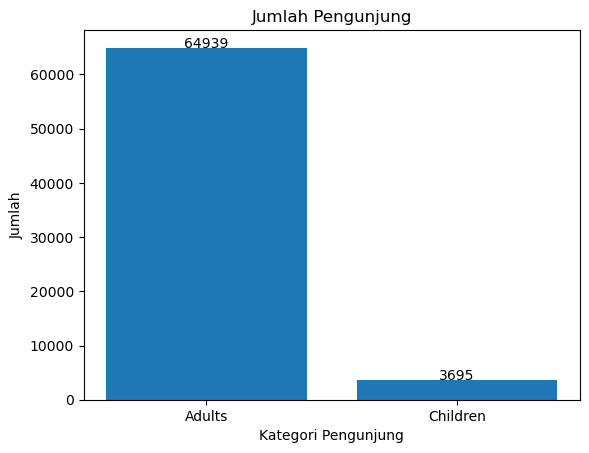

In [19]:
X = ['Adults', 'Children']
Y = [df.no_of_adults.sum(), df.no_of_children.sum()]

plt.bar(X, Y)

plt.title('Jumlah Pengunjung')

plt.xlabel('Kategori Pengunjung')
plt.ylabel('Jumlah')

for i in range(len(X)):
    plt.text(x = X[i], y = Y[i]+0.5, s = Y[i], ha = 'center')

plt.show()

Berdasarkan diagram batang di atas, lebih banyak pengunjung dengan kategori adults dibandingkan dengan children

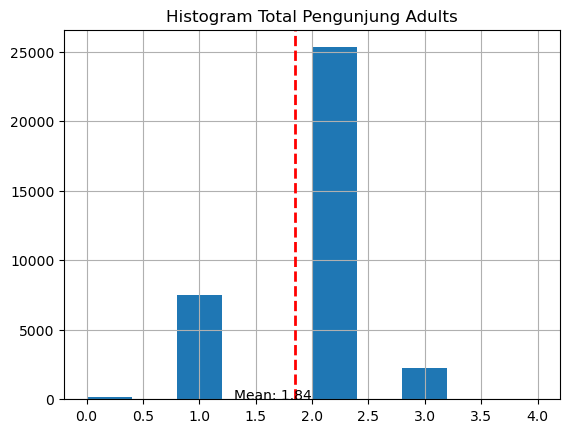

In [20]:
mean_total_adults = df.no_of_adults.mean()
df.no_of_adults.hist()
plt.title("Histogram Total Pengunjung Adults")
plt.axvline(mean_total_adults, color='r', linestyle='dashed', linewidth=2)
plt.text(x = df.no_of_adults.max()-2, y = df.no_of_adults.max()*0.5, s = 'Mean: {:.2f}'.format(mean_total_adults), size = 10, ha='right')
plt.show()

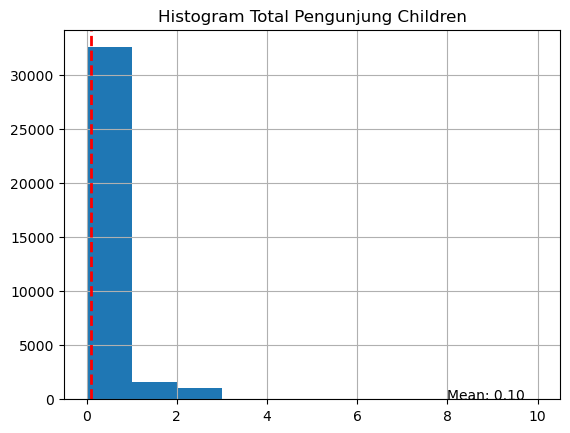

In [21]:
mean_total_children = df.no_of_children.mean()
df.no_of_children.hist()
plt.title("Histogram Total Pengunjung Children")
plt.axvline(mean_total_children, color='r', linestyle='dashed', linewidth=2)
plt.text(x = df.no_of_children.max()-2, y = df.no_of_children.max()*0.5, s = 'Mean: {:.2f}'.format(mean_total_children), size = 10)
plt.show()

Berdasarkan kedua diagram histogram di atas menunjukkan bahwa total pengunjung adults terbanyak yaitu dengan 2 Adults, sementara untuk pengunjung dengan kategori children yaitu dengan 0 children, atau tanpa membawa anak

### *2. Melihat hubungan antara tipe kamar yang dipesan ('room_type_preserved'), dan dengan kolom lainnya*

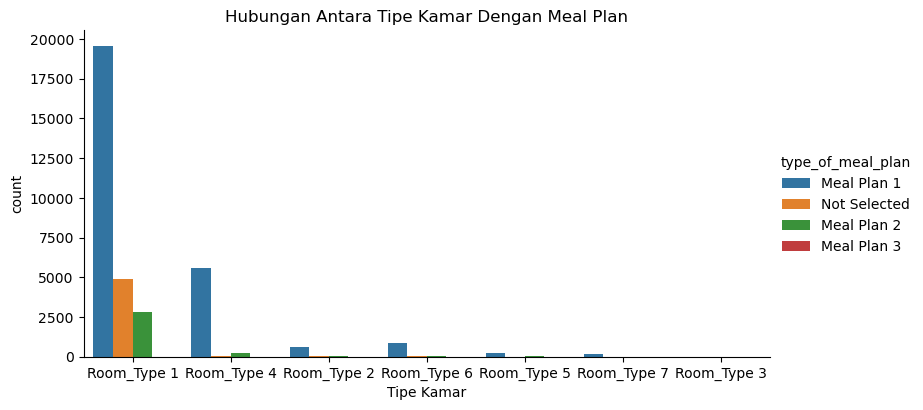

In [22]:
sns.catplot(data=df, x="room_type_reserved", hue="type_of_meal_plan", kind="count", height=4, aspect=2)
plt.title("Hubungan Antara Tipe Kamar Dengan Meal Plan")
plt.xlabel("Tipe Kamar")
plt.show()

Dari grafik di atas menjelaskan bahwa kamar dengan tipe 1 paling banyak memesan meal plan 1, di urutan kedua adalah room tipe 1. Untuk tidak memilih sarapan juga 

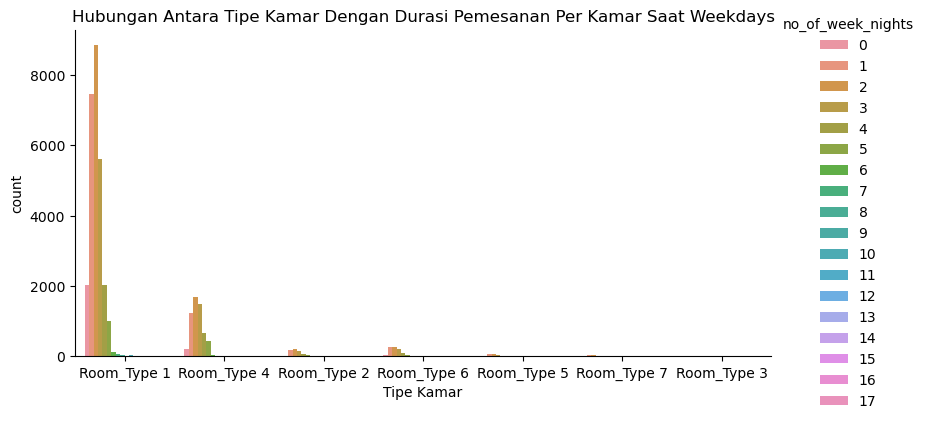

In [23]:
sns.catplot(data=df, x="room_type_reserved", hue="no_of_week_nights", kind="count", height=4, aspect=2)
plt.title("Hubungan Antara Tipe Kamar Dengan Durasi Pemesanan Per Kamar Saat Weekdays")
plt.xlabel("Tipe Kamar")
plt.show()

Dari grafik di atas menjelaskan bahwa room yang paling dipesan adalah tipe 1 pada saat weekdays

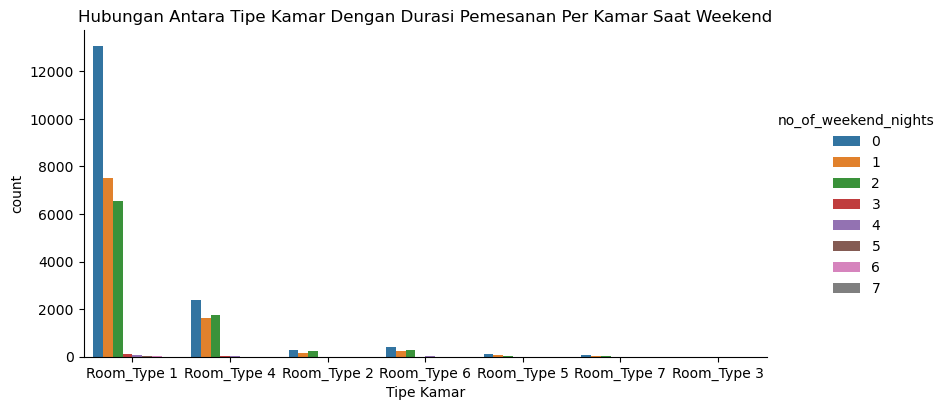

In [24]:
sns.catplot(data=df, x="room_type_reserved", hue="no_of_weekend_nights", kind="count", height=4, aspect=2)
plt.title("Hubungan Antara Tipe Kamar Dengan Durasi Pemesanan Per Kamar Saat Weekend")
plt.xlabel("Tipe Kamar")
plt.show()

Dari grafik di atas menjelaskan bahwa room yang paling dipesan adalah tipe 1 pada saat weekend

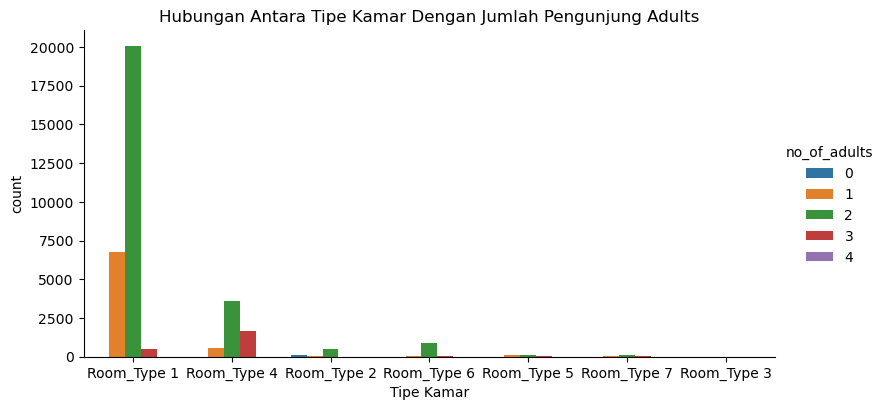

In [25]:
sns.catplot(data=df, x="room_type_reserved", hue="no_of_adults", kind="count", height=4, aspect=2)
plt.title("Hubungan Antara Tipe Kamar Dengan Jumlah Pengunjung Adults")
plt.xlabel("Tipe Kamar")
plt.show()

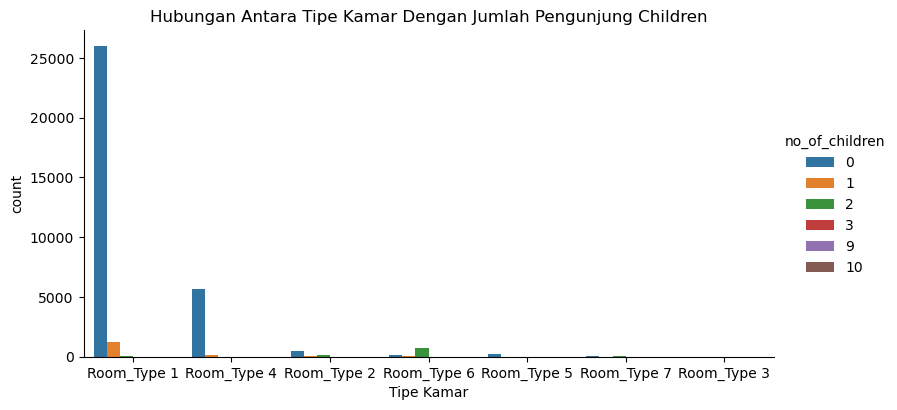

In [26]:
sns.catplot(data=df, x="room_type_reserved", hue="no_of_children", kind="count", height=4, aspect=2)
plt.title("Hubungan Antara Tipe Kamar Dengan Jumlah Pengunjung Children")
plt.xlabel("Tipe Kamar")
plt.show()

Dari kedua grafik di atas, menjelaskan bahwa pengunjung pada room tipe 1 didominasi oleh pemesan dengan jumlah adults yaitu 2, dan jumlah children yaitu 0

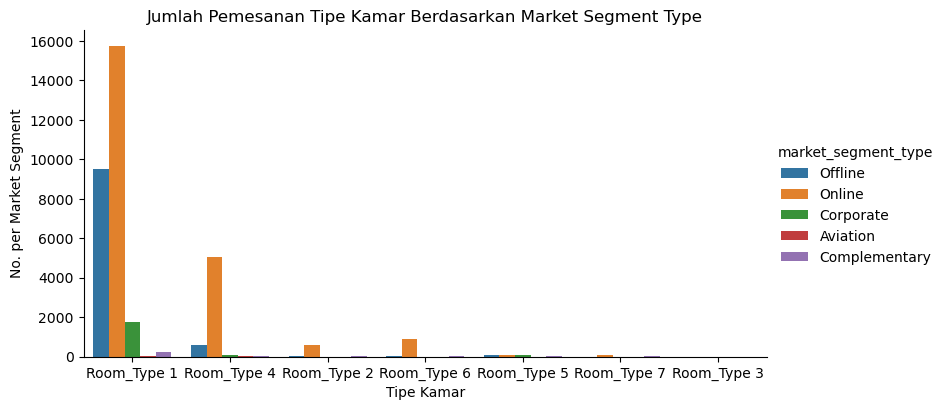

In [27]:
sns.catplot(data=df, x="room_type_reserved", hue="market_segment_type", kind="count", height=4, aspect=2)
plt.title("Jumlah Pemesanan Tipe Kamar Berdasarkan Market Segment Type")
plt.xlabel("Tipe Kamar")
plt.ylabel("No. per Market Segment")
plt.show()

Dari grafik di atas, menjelaskan bahwa pengunjung pada seluruh tipe kamar didominasi oleh pemesanan secara online

### *3. Melihat hubungan antara market_segment_type dengan booking status*

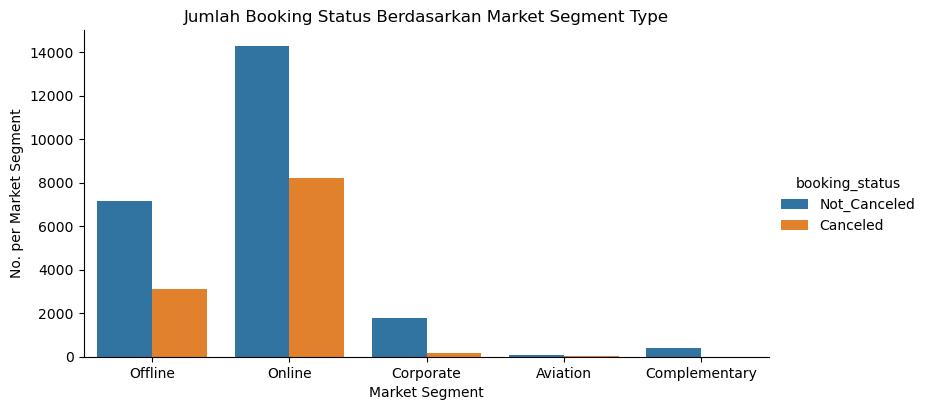

In [28]:
sns.catplot(data=df, x="market_segment_type", hue="booking_status", kind="count", height=4, aspect=2)
plt.title("Jumlah Booking Status Berdasarkan Market Segment Type")
plt.xlabel("Market Segment")
plt.ylabel("No. per Market Segment")
plt.show()

Dari grafik di atas menjelaskan bahwa jumlah pemesanan dengan status 'Not Canceled' didominasi oleh segmen Online, namun mendominasi juga jumlah pemesanan dengan status 'Canceled'. Dari sini saya juga menyimpulkan bahwa lebih banyak customer yang memesan secara online. Dari sini timbul pertanyaan, "Bagaimana cara mengatasi jumlah booking cancel yang masih hampir 50% dari total pemesanan online?"

### *4. Membandingkan total pemesanan antara saat weekend dengan weekdays*

In [29]:
# Mengetahui jumlah pemesanan saat weekdays saja
print('Total pemesanan yang hanya menginap pada saat Weekdays : {}'.format(df.loc[(df.no_of_week_nights != 0) & (df.no_of_weekend_nights == 0)].shape[0]))

Total pemesanan yang hanya menginap pada saat Weekdays : 16267


In [30]:
# Mengetahui jumlah pemesanan saat weekend saja
print('Total pemesanan yang hanya menginap pada saat Weekend : {}'.format(df.loc[(df.no_of_weekend_nights != 0) & (df.no_of_week_nights == 0)].shape[0]))

Total pemesanan yang hanya menginap pada saat Weekend : 2273


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


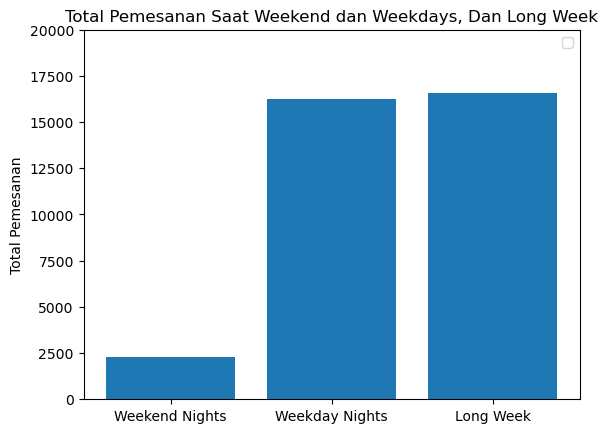

In [31]:
weekend_nights = df.loc[(df.no_of_weekend_nights != 0) & (df.no_of_week_nights == 0)].shape[0]
week_nights = df.loc[(df.no_of_week_nights != 0) & (df.no_of_weekend_nights == 0)].shape[0]
long_week = df.loc[(df.no_of_week_nights != 0) & (df.no_of_weekend_nights != 0)].shape[0]

x_labels = ['Weekend Nights', 'Weekday Nights', 'Long Week']

fig, ax = plt.subplots()
bar1 = ax.bar(x_labels, [weekend_nights, week_nights, long_week])
ax.set_ylabel('Total Pemesanan')
ax.set_title('Total Pemesanan Saat Weekend dan Weekdays, Dan Long Week')
ax.set_ylim(0,20000)
ax.legend()

plt.show()

Dari grafik di atas terlihat bahwa jumlah pemesanan lebih banyak dilakukan untuk Long Week (Campuran antara Weekend dan Weekdays) dibandingkan dengan kategori lainnya.

### *5. Melihat hubungan antara total pengunjung dengan kebutuhan lahan parkir*

In [32]:
total_pengunjung_per_booking_id = df.no_of_adults + df.no_of_children
park_or_no = df.required_car_parking_space

In [33]:
pengunjung_parkir = pd.DataFrame({'total_pengunjung': total_pengunjung_per_booking_id.to_list(),
                                  'park_or_no': park_or_no.to_list()})

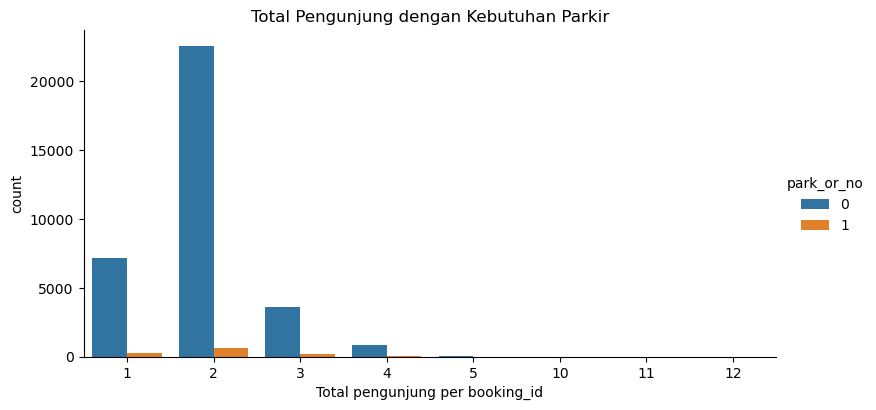

In [34]:
sns.catplot(data=pengunjung_parkir, x="total_pengunjung", hue="park_or_no", kind="count", height=4, aspect=2)
plt.title("Total Pengunjung dengan Kebutuhan Parkir")
plt.xlabel("Total pengunjung per booking_id")
plt.show()

Berdasarkan grafik di atas, pengunjung didominasi dengan total 2 orang (Adults + Children atau dewasa saja), dan paling banyak membutuhkan lahan parkir. Dari grafik ini juga dapat terlihat, bahwa jumlah pengunjung dalam satu pemesanan tidak ada yang melebihi 4 orang

### *6. Melihat hubungan antara tipe room yang dipesan oleh pelanggan dengan special request*

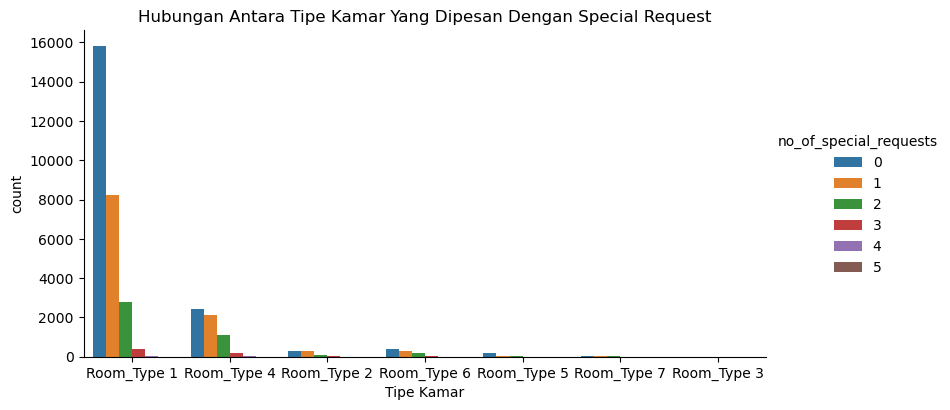

In [35]:
sns.catplot(data=df, x="room_type_reserved", hue="no_of_special_requests", kind="count", height=4, aspect=2)
plt.title("Hubungan Antara Tipe Kamar Yang Dipesan Dengan Special Request")
plt.xlabel("Tipe Kamar")
plt.show()

Berdasarkan grafik di atas, jumlah pemesanan spesial pada setiap tipe kamar didominasi oleh 0, mungkin ini berarti pengunjung paling banyak tidak memesan spesial request. Dalam hal ini saya mengasumsikan bahwa 0 bernilai negatif

### *7. Mengklasifikasikan pelanggan antara yang 'nakal', 'loyal', 'Sangat Loyal' dengan cara menampilkan groupby Booking_ID, lalu menampilkan 'no_of_previous_cancellations', 'repeated_guest', 'no_of_previous_bookings_not_canceled'*

In [36]:
klasifikasiPelanggan = df[['Booking_ID', 'market_segment_type', 'repeated_guest',
                           'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                           'booking_status']]

In [37]:
klasifikasiPelanggan.head()

,Booking_ID,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status
0,INN00001,Offline,0,0,0,Not_Canceled
1,INN00002,Online,0,0,0,Not_Canceled
2,INN00003,Online,0,0,0,Canceled
3,INN00004,Online,0,0,0,Canceled
4,INN00005,Online,0,0,0,Canceled


Keterangan Score atau Klasifikasi pada masing-masing kolom :
* repeated_guest                        : {0: No, 1: Yes}
* no_of_previous_cancellations          : {0: paling kecil (tidak pernah)}
* no_of_previous_bookings_not_canceled  : {0: paling kecil (tidak pernah)}
* booking_status                        : {0: Canceled, 1: Not canceled}

In [38]:
booking_status_mapping = {'Not_Canceled':1, 'Canceled':0}

klasifikasiPelanggan['booking_status'] = klasifikasiPelanggan['booking_status'].map(booking_status_mapping)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3588\330342854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klasifikasiPelanggan['booking_status'] = klasifikasiPelanggan['booking_status'].map(booking_status_mapping)


In [39]:
klasifikasiPelanggan

,Booking_ID,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status
0,INN00001,Offline,0,0,0,1
1,INN00002,Online,0,0,0,1
2,INN00003,Online,0,0,0,0
3,INN00004,Online,0,0,0,0
4,INN00005,Online,0,0,0,0
...,...,...,...,...,...,...
36270,INN36271,Online,0,0,0,1
36271,INN36272,Online,0,0,0,0
36272,INN36273,Online,0,0,0,1
36273,INN36274,Online,0,0,0,0


Klasifikasi Pelanggan :
* **Sangat Loyal** = (repeated_guest : 1, no_of_previous_cancellations : 0, no_of_previous_bookings_not_canceled > 20, booking_status : 1)

* **Loyal** = (repeated_guest : 1, no_of_previous_cancellations : 0 0,     20 > no_of_previous_bookings_not_canceled >= 5 , booking_status : 1)

In [40]:
# Daftar Pelanggan 'Sangat Loyal'
Sangat_Loyal = klasifikasiPelanggan[(klasifikasiPelanggan.repeated_guest == 1) & (klasifikasiPelanggan.no_of_previous_cancellations == 0) \
                     & (klasifikasiPelanggan.no_of_previous_bookings_not_canceled>=20) & (klasifikasiPelanggan.booking_status==1)].sort_values(by='no_of_previous_bookings_not_canceled', ascending=False)
Sangat_Loyal

,Booking_ID,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status
19292,INN19293,Complementary,1,0,32,1
14422,INN14423,Complementary,1,0,31,1
32689,INN32690,Complementary,1,0,30,1
32380,INN32381,Complementary,1,0,29,1
25125,INN25126,Complementary,1,0,28,1
21568,INN21569,Complementary,1,0,27,1
20389,INN20390,Complementary,1,0,26,1
13576,INN13577,Corporate,1,0,25,1
16672,INN16673,Corporate,1,0,25,1
28161,INN28162,Complementary,1,0,25,1


In [41]:
# Daftar Pelanggan 'Loyal'
Loyal = klasifikasiPelanggan[(klasifikasiPelanggan.repeated_guest == 1) & (klasifikasiPelanggan.no_of_previous_cancellations == 0) \
                     & (klasifikasiPelanggan.no_of_previous_bookings_not_canceled >= 5) & (klasifikasiPelanggan.no_of_previous_bookings_not_canceled < 20) & (klasifikasiPelanggan.booking_status==1)].sort_values(by='no_of_previous_bookings_not_canceled', ascending=False)
Loyal

,Booking_ID,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status
17639,INN17640,Complementary,1,0,19,1
11434,INN11435,Corporate,1,0,19,1
7122,INN07123,Complementary,1,0,18,1
21224,INN21225,Corporate,1,0,18,1
31231,INN31232,Corporate,1,0,17,1
...,...,...,...,...,...,...
26963,INN26964,Corporate,1,0,5,1
5994,INN05995,Corporate,1,0,5,1
5829,INN05830,Corporate,1,0,5,1
28599,INN28600,Offline,1,0,5,1


In [42]:
# Daftar Pelanggan 'Nakal'
Nakal = klasifikasiPelanggan[(klasifikasiPelanggan.repeated_guest == 0) & (klasifikasiPelanggan.no_of_previous_cancellations > 0)]
Nakal

,Booking_ID,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status


In [43]:
print('Jumlah Akun Pelanggan Dengan Kategori "Sangat Loyal" : {} Akun'.format(len(Sangat_Loyal)))
print('Jumlah Akun Pelanggan Dengan Kategori "Loyal" : {} Akun'.format(len(Loyal)))
print('Jumlah Akun Pelanggan Dengan Kategori "Nakal" : {} Akun'.format(len(Nakal)))

Jumlah Akun Pelanggan Dengan Kategori "Sangat Loyal" : 18 Akun
Jumlah Akun Pelanggan Dengan Kategori "Loyal" : 146 Akun
Jumlah Akun Pelanggan Dengan Kategori "Nakal" : 0 Akun


Dari analisis klasifikasi pelanggan di atas, terlihat bahwa terdapat Akun pelanggan dengan kategori :
* ***Sangat Loyal*** sebanyak 18 Akun,
* ***Loyal*** sebanyak 146 Akun, dan
* ***Nakal*** sebanyak 0 Akun.
* Dapat disimpulkan bahwa **tidak ada pelanggan "Nakal"** yang hanya melakukan fake order.

### Saran :
* Mungkin dapat dipertimbangkan oleh divisi Sales dan Marketing untuk menarik pelanggan agar lebih sering melakukan reservasi di Hotel ini dengan cara memberikan promo, pop-up notification di smartphone, meningkatkan penggunaan ads secara efektif.